<h2>최적화 문제를 풀어봅시다! - From 2021 IBM Quantum Africa Challenge</h3>

양자 컴퓨팅은 고전 컴퓨터에서 해결할 수 없는 문제를 해결할 수 있을 것으로 기대되기 때문에 컴퓨팅에 혁명을 일으킬 잠재력을 지니고 있습니다. 양자컴퓨터가 고전 자원을 능하가는 결과를 낼 수 있게 되는 것을 양자 이득이라고 부르며, 이 목표를 달성하기 위해, 세계는 열정적이고 유능한 사용자들, 즉 그 기술을 각각의 분야에 적용할 줄 아는 사람들을 필요로 하고 있습니다.

이 도전에서 여러분은 Qiskit을 사용해 양자 컴퓨팅을 사용해 실생활의 문제와 유사한 문제를 해결하는 것을 경험하게 될 것입니다. 현재 또는 미래의 양자 컴퓨터 사용자로서, 여러분은 양자 계산에 적합한 문제가 무엇인지, 여러분이 선택한 알고리즘과 호환되도록 여러분의 문제/입력을 구조화하는 방법, 그리고 문제를 해결하기 위해 주어진 알고리즘과 양자 솔루션을 실행하는 방법을 배우게 될 것입니다.

## 1.1 초기 설정

실습을 위해서는 qiskit, qiskit-ibm-runtime, qiskit-algorithms, qiskit-optimization 패키지가 설치 되어 있어야 합니다.

다음의 셀을 실행시킨 후 커널을 restart 해주세요!

In [ ]:
%pip install -U qiskit[all]==1.0.0b1 qiskit-ibm-runtime qiskit-algorithms qiskit-optimization

설치가 잘 되었는지 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
import qiskit_ibm_runtime
import qiskit_algorithms
import qiskit_optimization

%qiskit_version_table

## 목차

이 노트북의 목차는 다음과 같습니다.

1. 초기 설정
1. 목차
1. Qiskit Ecosystem 소개
1. 이차 문제 (Quadratic Problems)
1. 이차 문제로서의 농장 문제 (Crop-Yield Problem as a Quadratic Problem)
1. 양자컴퓨터로 문제를 풀어봅시다 - 시뮬레이터
1. 양자컴퓨터로 문제를 풀어봅시다 - 실제 백엔드

## Qiskit Ecosystem 이란?

Qiskit Ecosystem은 Qiskit을 기반으로 하거나 확장하는 소프트웨어 및 튜토리얼의 모음입니다. Ecosystem의 목표는 Qiskit을 사용하는 양자 기술의 개발을 기념하고, 지원 및 가속화하는 것입니다. 전체 프로젝트의 목록은 [이곳](https://github.com/Qiskit/ecosystem)에서 확인할 수 있습니다.

이번 실습에서는 Ecosystem 프로젝트 중 하나인 금융을 포함한 최적화 문제를 풀기 위한 생태계 프로젝트인 [Qiskit-optimization](https://github.com/qiskit-community/qiskit-optimization)을 사용할 것입니다.

Qiskit Optimization은 거의 모든 최적화 문제에 사용되는 다양한 수학적 표현을 높은 수준에서 구현하고 변환해주는 것을 포함해, 문제를 기존 시뮬레이터 및 Qiskit을 통한 실제 양자 백엔드에서 실행할 수 있도록 해주는 오픈소스 패키지입니다.

Optimization 모듈은 IBM의 또다른 최적화 문제 해결을 위한 오픈소스 프로젝트인 [docplex](https://www.ibm.com/docs/en/icos/22.1.1?topic=docplex-python-modeling-api)를 사용하여 쉽고 효율적인 최적화 문제 모델링을 가능하게 합니다. 서로 다른 문제 표현 간의 자동 변환뿐만 아니라 균일한 인터페이스를 통해 QAOA(양자 근사 최적화 알고리즘)와 같은 변형 양자 알고리듬부터 Qiskit Algorms(Qiskit Algorms)에서 제공하는 기본 알고리듬들을 활용하여 Grover Optimizer(그로버 옵티마이저)를 사용한 Grover Adaptive Search(그로버 적응 검색)에 이르기까지 다양한 알고리듬을 사용해 문제를 해결할 수 있습니다. 또한 테스트, 검증 및 벤치마킹을 위한 호환되는 고전적인 도구들도 제공됩니다



## (이차 문제) Quadratic Problems

몇몇 계산 과학의 문제는, [이차 방정식](https://en.wikipedia.org/wiki/Quadratic_equation)의 최저점을 찾기 등의 최적화 문제로 표현되기도 합니다. 이런 유형의 문제들은 주로 금융, 농업, 제조 관리와 경영등에서 자주 맞닥드릴 수 있습니다.

[이차 프로그래밍](https://en.wikipedia.org/wiki/Quadratic_programming)은 금융의 문제에서 리스크를 최소화 하거나 공장에서 제조 레이아웃을 최적화 함에 있어서 물류의 이동 거리를 최조화 하는 등등의 문제에 사용됩니다. 이 노트북은 인류가 맞닥드린 큰 문제중, 식량 공급의 문제에 있어서 중요한 농장에 심을 작물을 선택을 최적화 하는 문제를 다루어 보고자 합니다. 참고로 이 노트북은 2021년 아프리카 퀀텀 챌린지에 사용되어 많은 아프리카의 계산 과학자들이 식량의 문제에 양자컴퓨터를 활용하는 것에 관심을 갖도록 도운 문제이기도 합니다. 

이러한 이차 문제는 주요한 두가지의 특징을 지니고 있습니다. 첫번째는 수식이 다변수 이차 방정식으로 모델링 된다는 것이며 두번째는 수식이 다양한 범위와 형태의 제한 조건들(Constraints)을 갖는 다는 것입니다. 

---

이차 문제들은 대부분 다음과 같은 구조를 갖습니다. 주어진 벡터는 $n$개의 변수 $x\in\mathbb{R}^n$를 가지며 최소화 해야 하는 이차식은 다음과 같습니다.

$$
\begin{align}
\text{minimize}\quad & f\left(x\right)=\frac{1}{2}x^\top{}\mathbf{Q}x + c^\top{}x &\\
\text{subject to}\quad & \mathbf{A}x\leq{}b&\\
& x^\top{}\mathbf{Q}_ix + c_{i}^\top{}x\leq{}r_i,\quad&\forall{}i\in[1,k_q]\\
& l_i\leq{}x_i\leq{}u_i,\quad&\forall{}i\in[1,k_l]\\
\end{align}
$$

$\mathbf{Q}$, $\mathbf{Q}_i$, 와 $\mathbf{A}$ 는 $n\times{}n$ 크기의 대칭 행렬입니다. $c$ 와 $c_i$ 는 $n\times{}1$ 크기의 행벡터 입니다. $\mathbf{Q}_i$, $\mathbf{A}$, $c_i$, $l_i$, 와 $u_i$는 각각 변수 $x$의 제한 조건을 정의합니다. 이차 문제의 중심에 있는 이차 방정식은, 최소화 함수에 행렬들을 곱하여 찾아내게 됩니다. '$\leq{}$'이 위에 사용되었는데, 이 뿐만 아니라 다양한 관계를 나타내는 부등식들("$<$", "$=$", "$>$", "$\geq$", 혹은 "$\leq$")도 사용 가능합니다. 

2차에 대한 유효한 해는 문제에 대한 모든 조건을 만족시켜야 합니다. 몇 가지 제약 조건의 예가 아래에 제시되어 있습니다. 처음 두 개는 선형 제약식이고 세 번째 예는 이차 제약식입니다.

$$ x_1 + x_4 \leq{} 10$$

$$ x_2 - 3x_6 = 10$$

$$x_1x_2 - 4x_3x_4 + x_5 \leq{} 15 $$


Qiskit Optimization 패키지는 `QuadraticProgram` 인스턴스를 사용해 이러한 문제를 파이썬에 입력할 수 있도록 해줍니다. 위에서 보여드린 예시에서는 행렬이 문제를 정의하기 위해 사용되었지만, `QuadraticProgram`은 여러분이 문제를 더 직접적으로, 직관적으로 설계할 수 있도록 해줍니다. `QuadraticProgram`가 어떻게 동작하는지 확인하기 위해서 다음의 세개의 변수를 지니는 이차 식을 예제로 삼아 코딩 실습을 해보도록 합시다. 


$$\begin{align}
\text{minimize}\quad{} & f(x)=(x_1)^2 + (x_2)^2 - x_1x_2 - 6x_3 \\
\text{subject to}\quad{} & x_1 + x_2 = 2             \\
                         & -2 \leq{} x_2 \leq{} 2    \\
                         & -2 \leq{} x_3 \leq{} 4    \\
\end{align}$$

이어지는 코드에서, 위에 주어진 이차 문제를 `QuadraticProgram` 인스턴스를 사용해 작성해 보도록 하겠습니다. 다음의 [튜토리얼](https://github.com/qiskit-community/qiskit-optimization/blob/main/docs/tutorials/01_quadratic_program.ipynb)을 미리 들여다 보시면 도움이 될것입니다. 

최소화 해야 하는 이차항은, 대상이라 불리고, 파이썬의 사전 변수를 사용해 저장됩니다. 이것은 여러분, 즉 개발자들이, 특정한 변수와 항목들에 대한 변수를 각각 지정할 수 있게 해줍니다. 이 사전 변수의 키는 $f(x)$에 정의되는 변수의 이름입니다. 예를 들어 `("x_1","x_2")`는 $x_1x_2$를 의미합니다. 이 키들의 각각의 값은 항목이라 불리는 계수가 됩니다. $f(x)$에 뺄셈으로 정의된 변수들의 항목 값은 반드시 음수여야 합니다. 

In [2]:
from qiskit_optimization import QuadraticProgram

quadprog = QuadraticProgram(name="example 1")
quadprog.integer_var(name="x_1", lowerbound=0, upperbound=4)
quadprog.integer_var(name="x_2", lowerbound=-2, upperbound=2)
quadprog.integer_var(name="x_3", lowerbound=-2, upperbound=4)
quadprog.minimize(
    linear={"x_3": -6},
    quadratic={("x_1", "x_1"): 1, ("x_2", "x_2"): 1, ("x_1", "x_2"): -1},
)
quadprog.linear_constraint(linear={"x_1": 1, "x_2": 1}, sense="=", rhs=2)

<LinearConstraint: x_1 + x_2 == 2 'c0'>

`QuadraticProgram` 은 총 세가지 형태의 변수: 바이너리, 정수 그리고 연속변수를 가질 수 있습니다. 위에서 작성한 `QuadraticProgram`은 LP(**L**inear **P**rogramming) string이라는 가벼운 텍스트 기반의 형식으로 출력해서 확인 할 수 있습니다.

In [3]:
print(quadprog.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: example 1

Minimize
 obj: - 6 x_3 + [ 2 x_1^2 - 2 x_1*x_2 + 2 x_2^2 ]/2
Subject To
 c0: x_1 + x_2 = 2

Bounds
       x_1 <= 4
 -2 <= x_2 <= 2
 -2 <= x_3 <= 4

Generals
 x_1 x_2 x_3
End



문제의 최대 지수가 2인 단일 2차 방정식으로 표현될 수 있는 최적화 문제는 위의 예제와 같이 모두 입력으로 사용할 수 있습니다. 이 문제나 실습에서 사용할 농장의 문제 또한 실제 문제의 방정식이나 계수와는 다소 거리가 있을 수 있지만, 여러분이 적용하고자 하는 문제가 있다면 위의 코드를 가볍게 수정하여 사용할 수 있을 것입니다. 

## 이차 문제로서의 농장 문제 (Crop-Yield Problem as a Quadratic Problem)

양자 컴퓨터를 사용하여 이차 프로그램을 해결하는 방법을 배우기 위해, 이 노트북에서는 두 가지 알고리즘을 사용하여 작물 수확량 문제를 해결할 것입니다. 농장의 수익을 높이면서 위험을 줄이기 위해 농장의 작물과 경영을 최적화하는 것에 도전해 봅시다. 아프리카와 전 세계가 직면한 큰 도전 중 하나는 모든 사람이 먹을 충분한 식량을 생산하는 방법입니다. 여기서 문제는 수익이 아니라 수확한 작물의 총량(톤수)에 초점이 맞추어져 있습니다. 농사에 적합한 3헥타르의 땅을 가진 농장이 있다고 상상해 봅시다. 여러분은 4가지 중에서 어떤 작물을 심을지 선택해야 합니다. 또한 당신은 각각의 몇 헥타르를 심어야 하는지도 결정해야 합니다. 당신이 심을 수 있는 4가지 작물은 밀, 대두, 옥수수 그리고 밀어내기 작물입니다. 네 번째 작물인 밀어내기 작물은 수확한 후에 팔 수 없지만 다른 작물의 수확량을 늘리는 데 도움을 주는 역할을 합니다.



<table>
    <tr>
        <th>
            <img src="farm_template.svg" width="384px"/>
        </th>
    </tr>
    <tr>
        <th>
            여러분의 아름다운 3 헥타르 농장
        </th>
    </tr>
</table>

<table>
    <tr>
        <th>
        <img src="crop_wheat.svg" width="256px"/>
        </th>
        <th>
            <img src="crop_soybeans.svg" width="256px"/>
        </th>
        <th>
            <img src="crop_maize.svg" width="256px"/>
        </th>
        <th>
            <img src="crop_pushpull.svg" width="256px"/>
        </th>
    </tr>
    <tr>
        <th>
            밀
        </th>
        <th>
            콩
        </th>
        <th>
            옥수수
        </th>
        <th>
            밀어내기 작물
        </th>
<!--         <th>
            <p align="right" style="height:32px;padding-top:10px;">Wheat<img src="wheat.svg" width="32px" style="float:left;margin-top:-10px;margin-right:8px;"/></p>
        </th>
        <th>
            <p style="height:32px;padding-top:10px;">Soybeans<img src="soybeans.svg" width="32px" style="float:left;margin-top:-10px;margin-right:8px;"/></p>
        </th>
        <th>
            <p style="height:32px;padding-top:10px;">Maize<img src="maize.svg" width="32px" style="float:left;margin-top:-10px;margin-right:8px;"/></p>
        </th>
        <th>
            <p style="height:32px;padding-top:10px;">Push-Pull<img src="pushpull.svg" width="32px" style="float:left;margin-top:-10px;margin-right:8px;"/></p>
        </th> -->
    </tr>
</table>

여러분이 선택할 수 있는 농사 방법은 단작법, 혼작법, Push-Pull 농작법의 세 가지입니다. 아래의 그림을 함께 살펴보세요. 단작법은 한 작물만 농사를 짓는 곳입니다. 이 방법은 농장을 질병과 해충에 취약하게 만들 수 있기 때문에 전체 수확량에 영향을 미치게 됩니다. 어떤 경우에는 서로 다른 두 식물을 재배하면 둘 다 수확량이 증가하지만 때로는 수확량이 감소할 수 있습니다. 간작법은 다른 식물을 선택하여 수확량을 증가시키는 과정입니다. 밀어내기 작물은 해충을 퇴치하고 해충을 유인하는 역할을 합니다. 이 밀어내기 작물들을 큰 농장에 사용하게 되면 작물의 수확량은 증가하지만 밀어내기 작물의 수확량은 농장의 수익으로 사용 되지 못합니다. 밀어내기 작물은 농업이나 공업에 사용할 수 없거나 먹을 수 없을 수 있기 때문입니다.


<table>
    <tr>
        <th>
        <img src="farm_mono.svg" width="256px"/>
        </th>
        <th>
            <img src="farm_intercrop.svg" width="256px"/>
        </th>
        <th>
            <img src="farm_intercrop_pushpull.svg" width="256px"/>
        </th>
    </tr>
    <tr>
        <th>
           단작법(Monocropping)
        </th>
        <th>
            혼작법 (Intercropping)
        </th>
        <th>
            Push-Pull 농작법(Push-Pull farming)
        </th>
    </tr>
</table>

---
오직 특정한 경우에만 고전적인 방법을 사용하여 2차 프로그래밍 문제를 쉽게 풀 수 있습니다. 일반적인 의미에서 이 문제들은 고전적인 계산 방법으로는 풀기 어려운 문제의 한 종류인 NP-Hard 유형에 속합니다. 사실, 이러한 문제를 해결하는 가장 좋은 고전적인 방법은 휴리스틱을 포함하는데, 이는 근사적인 해결책을 찾는 기술입니다. 양자 컴퓨터는 일부 휴리스틱 문제에 대해 상당한 속도 향상과 더 나은 확장을 제공하는 것으로 알려져 있습니다. 작물 수확량 문제는 해결책이 입력 매개변수의 특정 조합이라는 점에서 조합 문제입니다. 여기에 표시된 문제는 고전적으로 해결할 수 있을 만큼 작지만, 더 큰 문제는 최적화해야 할 조합의 수 때문에 고전적인 컴퓨터에서는 다루기가 어렵습니다.


제시된 문제를 양자 컴퓨터로 해결하는 것은 다음의 세가지 단계를 포함합니다:

1. 문제의 정의
2. 알고리듬의 정의
3. 알고리듬을 백엔드에 실행

이제 Qiskit을 사용해 문제의 정의를 시작해 봅시다.

### 농장 문제의 정의 (Define the Crop-Yield problem)

이어지는 내용에서는 여러분이 해결해야 할 문제를 조금더 정확하게 정의해 보도록 하겠지만 아직 `QuadraticProgram` 인스턴스로의 작업은 진행되지 않습니다. 이 부분의 마지막에 `QuadraticProgram` 인스턴스를 활용해 구현해 볼 것입니다.

여러분의 농장은 $3~ha$ 크기이며, 각각의 작물은 $0~ha$ 이나 $1~ha$만큼 심을 수 있습니다. 농장의 수확량은 각 작물이 서로에게 미치는 영향을 2차 계수로 나타내는 2차 함수로 정의합니다. 이 2차 함수의 변수는 심을 작물의 헥타르 수이고 최대화하기 위한 목적 함수는 사용 가능한 작물의 수확량(톤)입니다. 이 문제에 대한 수학적 시나리오에서 모든 작물은 다른 작물의 수확량을 증가시킵니다. 그러나 해결해야 할 문제는 어떤 작물을 사용하여 최대 수확량을 달성하느냐입니다.


<img src="qubo_problem_graphical_variables.svg" width="534px"/>

농장 수확량(톤)은 2차 방정식으로 모델링되며, 각 작물이 사용하는 헥타르와 사용 가능한 총 헥타르에 대한 제약이 있습니다. 각 작물은 위에 표시된 것과 같이 다른 기호로 표시되며, 해당 식물을 심을 헥타르 수를 나타냅니다. 우리는 각 작물의 최대 1 헥타르까지만 심을 수 있으며 농장은 3 헥타르로 제한되어 있습니다.

<img src="qubo_problem_graphical.svg" width="400px"/>

----
#### Non-graphical notation
아래에 그림이 아닌 형태로 모델을 기술해 보도록 합시다.

$$
\begin{align}
    \text{maximize} \quad & 2(\operatorname{Wheat}) + \operatorname{Soybeans} + 4(\operatorname{Maize}) \\
    & + 2.4(\operatorname{Wheat}\times\operatorname{Soybeans}) \\ & + 4(\operatorname{Wheat}\times\operatorname{Maize})\\
    &+ 4(\operatorname{Wheat}\times\operatorname{PushPull}) \\ & + 2(\operatorname{Soybeans}\times\operatorname{Maize}) \\
                          & + (\operatorname{Soybeans}\times\operatorname{PushPull}) \\ & + 5(\operatorname{Maize}\times\operatorname{PushPull})
\end{align}
$$

$$
\begin{align}
\text{subject to} \quad & \operatorname{Wheat} + \operatorname{Soybeans} + \operatorname{Maize} + \operatorname{PushPull} \leq{} 3\\
& 0\leq{}\operatorname{Wheat}\leq{}1\\
& 0\leq{}\operatorname{Soybeans}\leq{}1\\
& 0\leq{}\operatorname{Maize}\leq{}1\\
& 0\leq{}\operatorname{PushPull}\leq{}1
\end{align}
$$

### 연습 1: 농장 문제의 변수들을 QuadraticProgram로 작성해 봅시다.

여러분의 첫번째 연습은 위의 모델을 `QuadraticProgram` 인스턴스를 사용해 표현해 보는 것입니다. 아래의 `cropyield_quadratic_program`에 해당 부분을 코딩해 봅시다. 위에서 사용했던 예제와 [Quadratic program tutorial](https://github.com/qiskit-community/qiskit-optimization/blob/main/docs/tutorials/01_quadratic_program.ipynb)을 참고해 보세요.



In [4]:
def cropyield_quadratic_program():
    cropyield = QuadraticProgram(name="Crop Yield")
    ##############################
    # Put your implementation here
    cropyield.integer_var(name="Wheat", lowerbound=0, upperbound=1)
    cropyield.integer_var(name="Soybean", lowerbound=0, upperbound=1)
    cropyield.integer_var(name="Maize", lowerbound=0, upperbound=1)
    cropyield.integer_var(name="PushPull", lowerbound=0, upperbound=1)
    cropyield.maximize(
        linear={"Wheat": 2, "Soybean": 1, "Maize": 4},
        quadratic={("Wheat", "Soybean"): 2.4, ("Wheat", "Maize"): 4, ("Wheat", "PushPull"): 4, 
        ("Soybean", "Maize"): 2, ("Soybean", "PushPull"): 1, ("Maize", "PushPull"): 5}
    )
    cropyield.linear_constraint(linear={"Wheat": 1, "Soybean": 1, "Maize": 1, "PushPull": 1}, sense="<=", rhs=3)
    ##############################

    return cropyield

In [5]:
qp = cropyield_quadratic_program()
print(qp.prettyprint())

Problem name: Crop Yield

Maximize
  5*Maize*PushPull + 2*Soybean*Maize + Soybean*PushPull + 4*Wheat*Maize
  + 4*Wheat*PushPull + 2.4*Wheat*Soybean + 4*Maize + Soybean + 2*Wheat

Subject to
  Linear constraints (1)
    Maize + PushPull + Soybean + Wheat <= 3  'c0'

  Integer variables (4)
    0 <= Wheat <= 1
    0 <= Soybean <= 1
    0 <= Maize <= 1
    0 <= PushPull <= 1



### 이차 문제 변환 (Converting QuadraticPrograms) - QUBO & Ising

이렇게 작성한 문제는 다양한 형태로 변환이 가능합니다. 변환이 없이도 양자컴퓨터로 바로 정답을 얻을 수 있지만, 여러가지 변환을 시도해 봄으로서 문제의 일부 특성 - 해결하는데 몇개의 큐비트가 소요되는가, 등 - 을 알수 있습니다.

먼저 문제를  QUBO로, 그 다음 이진 모델로 변환하여 총 몇개의 큐비트가 문제를 해결하는데 필요한지 확인해 봅시다.

---- 

Qiskit에서 2차 프로그램이 널리 사용되지만 우리가 사용할 알고리즘은 이진 변수를 필요로 합니다. Qiskit는 문제의 정수 변수를 이진 변수로 변환하는 자동화된 방법을 제공합니다. 이진 전용 형태는 _4차 비제약 이진 최적화_ 문제 또는 'QUBO'라고 불립니다. 변환은 Qiskit 최적화 모듈의 'QuadraticProgramToQUBO'를 사용하여 수행됩니다. 모든 정수 변수와 관련된 제약 조건은 이진 변수로 변환됩니다.

아래의 셀을 실행해서 작물 문제를 QUBO 문제로 변환해 봅시다.


In [6]:
from qiskit_optimization.converters import QuadraticProgramToQubo

conv = QuadraticProgramToQubo()
qb = conv.convert(qp)

print(qb.prettyprint())

Problem name: Crop Yield

Minimize
  26.4*Maize@0^2 + 47.8*Maize@0*PushPull@0 + 52.8*Maize@0*c0@int_slack@0
  + 105.6*Maize@0*c0@int_slack@1 + 26.4*PushPull@0^2
  + 52.8*PushPull@0*c0@int_slack@0 + 105.6*PushPull@0*c0@int_slack@1
  + 50.8*Soybean@0*Maize@0 + 51.8*Soybean@0*PushPull@0 + 26.4*Soybean@0^2
  + 52.8*Soybean@0*c0@int_slack@0 + 105.6*Soybean@0*c0@int_slack@1
  + 48.8*Wheat@0*Maize@0 + 48.8*Wheat@0*PushPull@0 + 50.4*Wheat@0*Soybean@0
  + 26.4*Wheat@0^2 + 52.8*Wheat@0*c0@int_slack@0 + 105.6*Wheat@0*c0@int_slack@1
  + 26.4*c0@int_slack@0^2 + 105.6*c0@int_slack@0*c0@int_slack@1
  + 105.6*c0@int_slack@1^2 - 162.39999999999998*Maize@0
  - 158.39999999999998*PushPull@0 - 159.39999999999998*Soybean@0
  - 160.39999999999998*Wheat@0 - 158.39999999999998*c0@int_slack@0
  - 316.79999999999995*c0@int_slack@1 + 237.6

Subject to
  No constraints

  Binary variables (6)
    Wheat@0 Soybean@0 Maize@0 PushPull@0 c0@int_slack@0 c0@int_slack@1



여러분의 문제는 이제 제한 조건이 모두 이진 조건으로 환산되어 있는 문제로 변환되었습니다. 이제 이 문제를 Ising 모델로 변환하여, 몇개의 큐비트가 계산에 사용될 것인지 확인해 봅시다. Qiskit-optimization을 사용하여 이차 문제를 바로 Ising 모델로 변환하는 기능에는 현재 버젼에서 몇가지 제한이 있습니다. 이 문제를 피하기 위해 여기에서는 이차 문제를 먼저 QUBO로 변환한 후 Ising 모델로 변환하는 과정을 거치고 있음을 참고해 주세요.

QUBO 모델을 Ising 모델로 변환하기 위해서는 `to_ising()` 함수가 사용됩니다. 이 함수를 사용해 문제를 변환하고 사용될 큐비트의 숫자와 해밀토니안을 확인해 봅시다.

In [7]:
# Estimate the number of qubits required

qubitop, offset = qb.to_ising()

print(f"Number of qubits required is {qubitop.num_qubits}")
print(qubitop)
print(f"Offset: {offset}")

Number of qubits required is 6
SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZIIZ', 'IIZIZI', 'IIZZII', 'IZIIIZ', 'IZIIZI', 'IZIZII', 'IZZIII', 'ZIIIIZ', 'ZIIIZI', 'ZIIZII', 'ZIZIII', 'ZZIIII'],
              coeffs=[ -9.6 +0.j, -11.35+0.j,  -8.45+0.j, -10.7 +0.j, -13.2 +0.j, -26.4 +0.j,
  12.6 +0.j,  12.2 +0.j,  12.7 +0.j,  12.2 +0.j,  12.95+0.j,  11.95+0.j,
  13.2 +0.j,  13.2 +0.j,  13.2 +0.j,  13.2 +0.j,  26.4 +0.j,  26.4 +0.j,
  26.4 +0.j,  26.4 +0.j,  26.4 +0.j])
Offset: 57.90000000000003


## 양자컴퓨터로 문제를 풀어봅시다 - 시뮬레이터

Qiskit을 사용해서 양자 알고리듬을 실행할 수 있는 크게 두 가지 방법이 있습니다:
1. 여러분의 랩탑/클라우드의 시뮬레이터를 사용하는 방법
2. 클라우드를 통해 서비스 되고 있는 실제 양자백엔드를 사용하는 방법.

시뮬레이터와 실제 양자 백엔드 모두 `backend`라 부릅니다. 이번 챕터에서는 먼저 시뮬레이터를 사용해 계산하는 것을 확인해 보고자 합니다. 이를 위해서 우리는 `qiskit.primitives`의 `Estimator`를 사용할 것입니다. 

양자 컴퓨터로 문제를 풀기 전, 먼저 고전 시뮬레이터를 사용해서 정답을 확인해 봅시다.

### 고전적 해답

이 문제의 고전적 해답은 Qiskit과 Numpy의 주요 기능을 사용해 간단히 구할 수 있습니다. QUBO 문제의 해답은 행렬식의 최소 eigenvalue를 찾은 것으로 얻어지는데, 다행이도, 그 안의 모든 과정을 알지 않아도 문제를  `MinimumEigensolver` 와 `MinimumEigenOptimizer`에 전달하는 것으로 결과를 얻을 수 있습니다. 

Optimizer는 주어진 문제를 Solver에 매개변수화 된 표현식으로 전달합니다. 이 매개변수들을 최적화 함으로서, Solver는 최소의 eigenvalue를 갖는 변수의 쌍을 얻어낼 수 있고 이것이 본 문제의 해답이 됩니다. 아래의 코드를 실행하여 우리의 문제의 정답을 확인해 봅시다. 아래의 코드에는 이차 표현식으로 만들었던 `qp`를 사용하도록 하겠습니다.

In [8]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer

mes = NumPyMinimumEigensolver()
meo = MinimumEigenOptimizer(min_eigen_solver=mes)
result = meo.solve(qp)
print(result)

fval=19.0, Wheat=1.0, Soybean=0.0, Maize=1.0, PushPull=1.0, status=SUCCESS


이차 문제를 QUBO로 변환하여 얻었던 `qb`도 함께 확인해 봅시다.

In [9]:
result = meo.solve(qb)
print(result.prettyprint())

objective function value: -18.999999999999943
variable values: Wheat@0=1.0, Soybean@0=0.0, Maize@0=1.0, PushPull@0=1.0, c0@int_slack@0=0.0, c0@int_slack@1=0.0
status: SUCCESS


양자컴퓨터로 이 문제와 같은 변수 최적화 문제를 해결할 수 있는 몇가지 방법이 있지만, 이곳에서는 [_Quantum Approximate Optimization Algorithm_](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)과 Qiskit Estimator를 사용해보도록 하겠습니다. 

QAOA의 자세한 설명은 [이 논문](https://arxiv.org/abs/1411.4028)을 후에 읽어보세요!

### QAOA Solution

Qiskit Estimator를 사용해 문제를 해결하기 위해

1. 문제의 Hamiltonian을 사용해 QAOA Ansatz를 구성합니다.
2. 최소화 과정에서 사용할 Cost Function을 Estimator를 사용해 정의합니다.
3. Post Processing을 통해 답을 구합니다.

아래의 코드를 실행하여 이 과정을 따라가 봅시다.

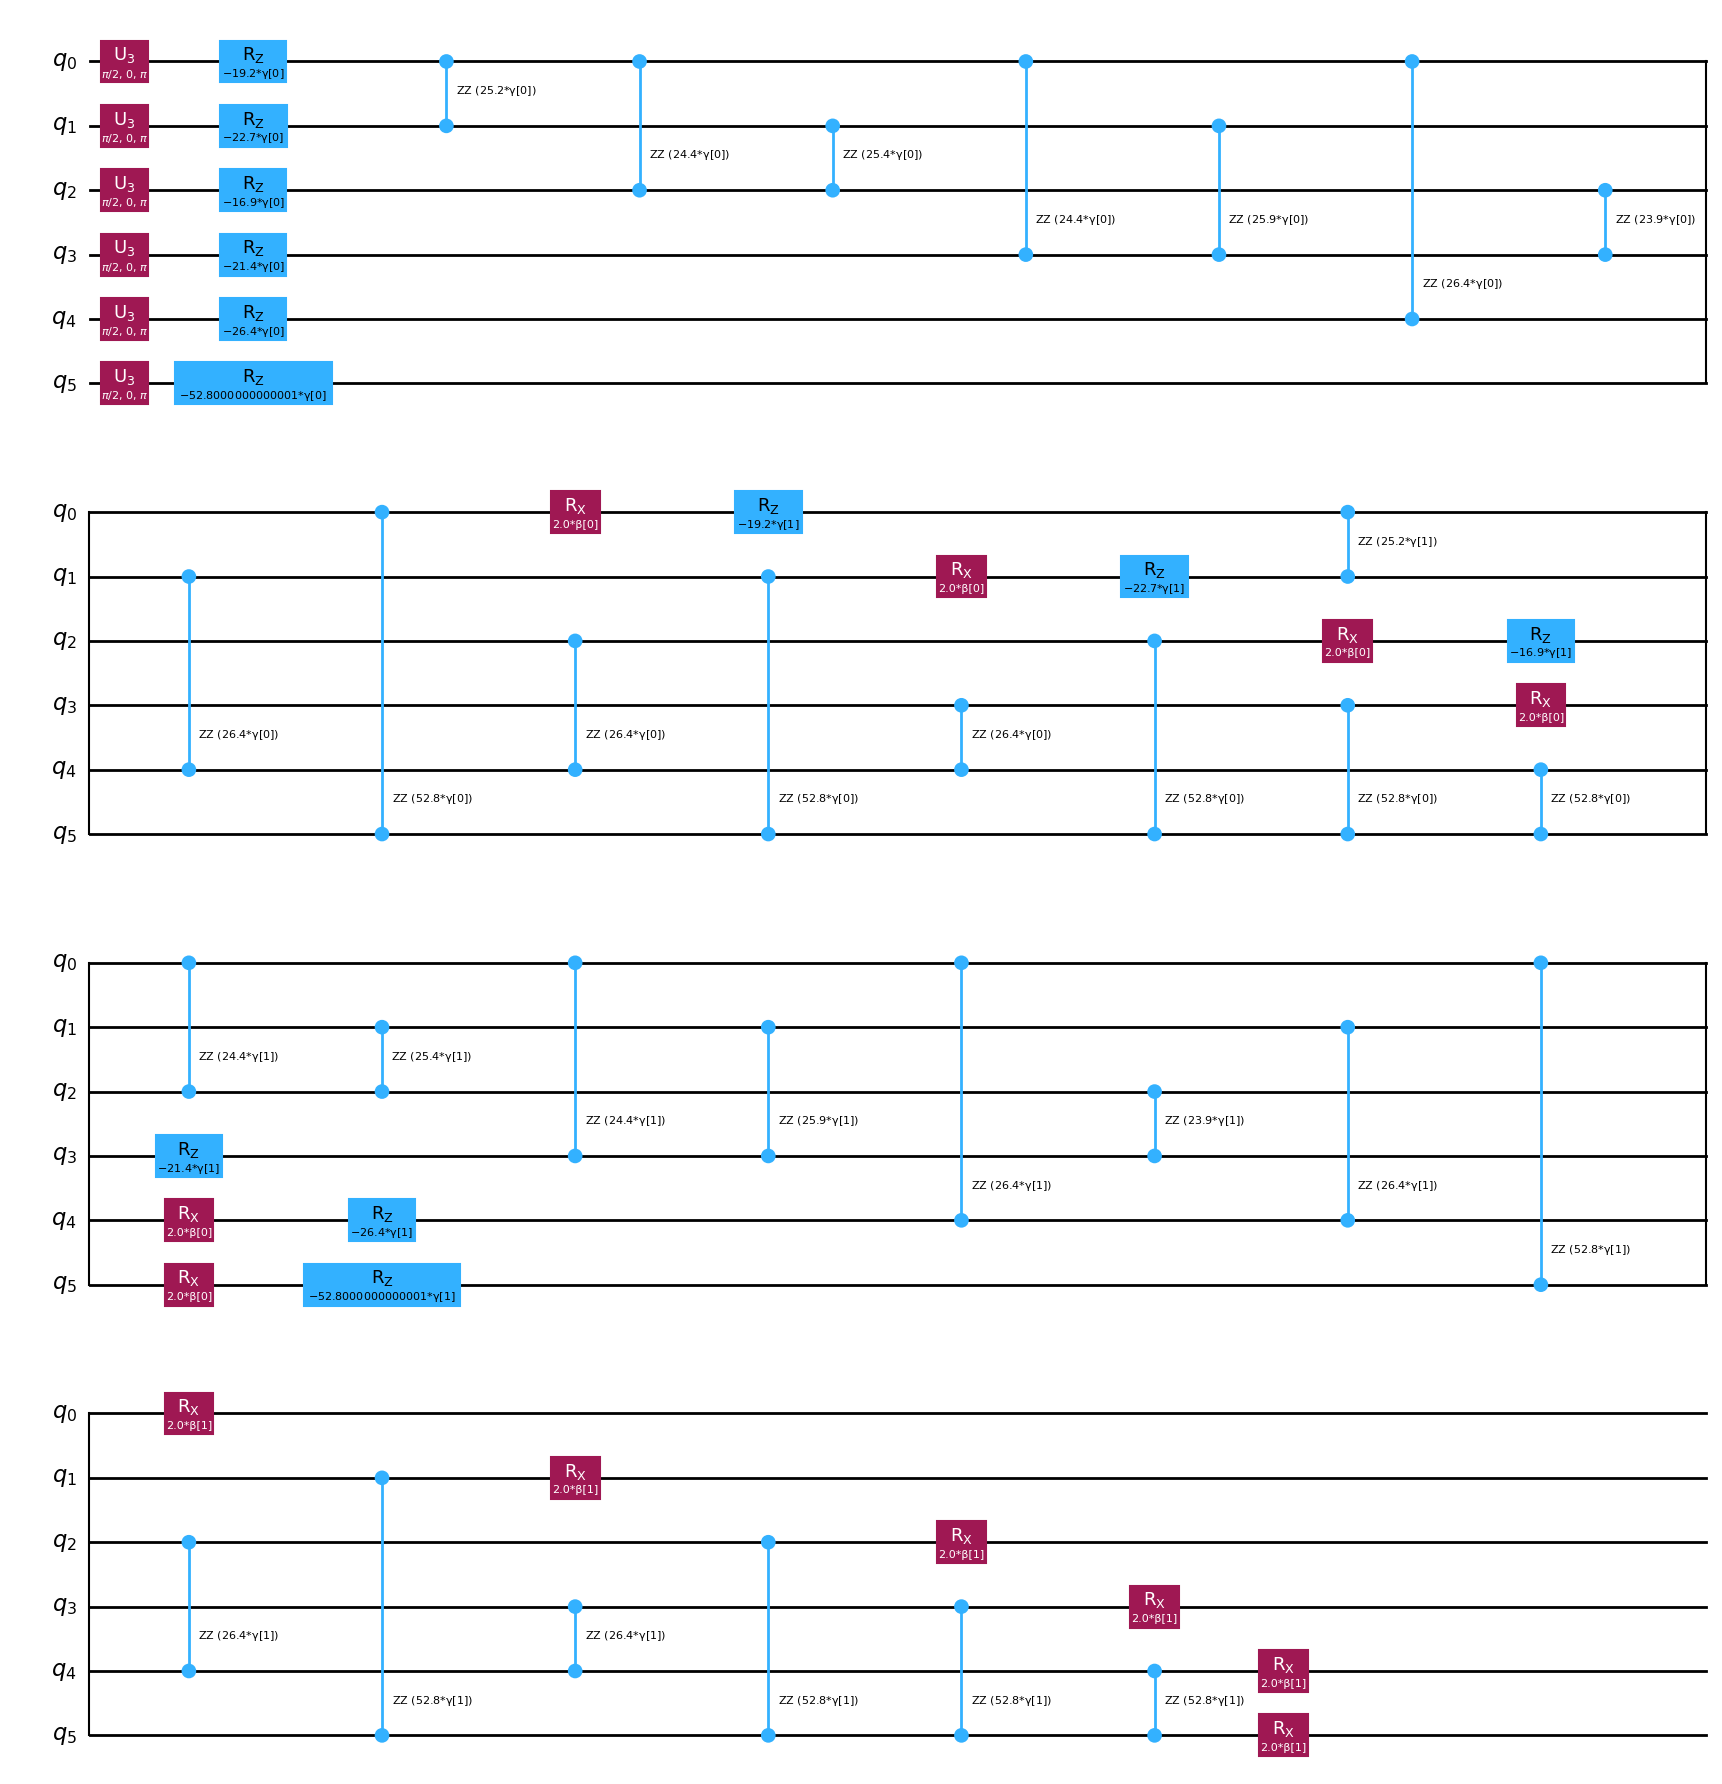

In [10]:
from qiskit.circuit.library import QAOAAnsatz

# QAOA ansatz circuit
ansatz = QAOAAnsatz(qubitop, reps=2)

ansatz.decompose(reps=3).draw(output="mpl", style="iqp")

두번째 연습 문제는 최적화 과정에 사용할 cost function을 정의하는 것입니다. 아래의 `cost_func` 함수에 해당 부분을 코딩해봅시다. 앞에서 공부했던 learning platform의 [Optimization: Max-Cut](https://learning.quantum.ibm.com/course/variational-algorithm-design/examples-and-applications#optimization-max-cut) 챕터를 참고해보세요.

In [11]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        cost (float): Energy estimate
    """
    global cost

    ##############################
    # Put your implementation here
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    ##############################

    return cost

In [12]:
def build_callback(callback_dict):
    """Return callback function that uses Estimator instance,
    and stores intermediate values into a dictionary.

    Parameters:
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance
        callback_dict (dict): Mutable dict for storing values

    Returns:
        Callable: Callback function object
    """
    def callback(current_vector):

        """Callback function storing previous solution vector,
        computing the intermediate cost value, and displaying number
        of completed iterations and average time per iteration.

        Values are stored in pre-defined 'callback_dict' dictionary.

        Parameters:
            current_vector (ndarray): Current vector of parameters
                                      returned by optimizer
        """
        # Keep track of the number of iterations
        callback_dict["iters"] += 1
        # Set the prev_vector to the latest one
        callback_dict["prev_vector"] = current_vector
        # Compute the value of the cost function at the current vector
        # This adds an additional function evaluation
        
        current_cost = cost

        callback_dict["cost_history"].append(current_cost)
        # Print to screen on single line
        print(
            "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
            end="\r",
            flush=True,
        )

    return callback

함수를 작성했으면 아래의 코드를 실행하여 QAOA 알고리즘을 실행해봅시다.

In [13]:
import numpy as np
from scipy.optimize import minimize
from qiskit.primitives import Estimator as QiskitEstimator
from qiskit.primitives import Sampler as QiskitSampler

x0 = 1.5 * np.pi * np.ones(ansatz.num_parameters)
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}
callback = build_callback(callback_dict)

qiskit_estimator = QiskitEstimator(options={"seed": 137})
qiskit_sampler = QiskitSampler(options={"seed": 137})

res = minimize(cost_func, x0, args=(ansatz, qubitop, qiskit_estimator), method="cobyla", callback=callback)
print(res)

     fun: -17.051933266931947t: -17.051933266931947]4]
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 137
  status: 1
 success: True
       x: array([5.72802332, 4.70192412, 4.71128569, 4.70823413])


In [14]:
print(f"Estimated function value (QAOA): {res.fun}")
print(f"Objective function value (numpy solver): {result.fval}")

Estimated function value (QAOA): -17.051933266931947
Objective function value (numpy solver): -18.999999999999943


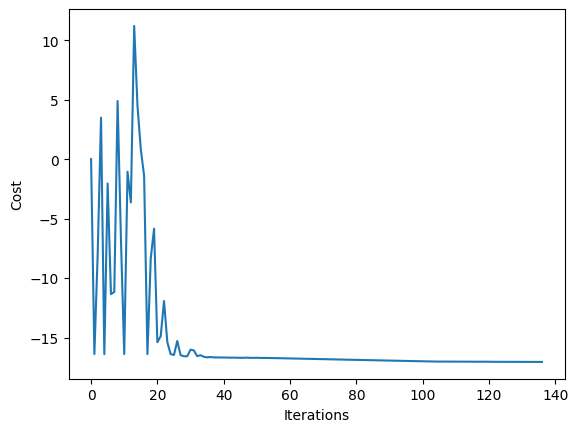

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

QAOA 알고리즘의 결과는 여러 솔루션들의 중첩으로 나타납니다. 우리는 QAOA 알고리즘의 결과에서 우리가 원하는 정답이 가장 높은 확률로 나타날 것으로 예상합니다. 아래의 코드를 실행하여 가장 높은 확률의 결과를 확인해봅시다.

In [16]:
def get_probabilities(sampler, ansatz, res):

    # Assign solution parameters to ansatz
    qc = ansatz.assign_parameters(res.x)

    # Add measurements to our circuit
    qc.measure_all()

    # Sample ansatz at optimal parameters
    samp_dist = sampler.run(qc).result().quasi_dists[0]
    probabilities = samp_dist.binary_probabilities()

    return probabilities

def print_solution(probabilities, conv, qp):

    # Get the most probable result
    binary_string = max(probabilities.items(), key=lambda kv: kv[1])[0]
    print(f"Most probable result: {binary_string}")

    # Convert the result to a solution and evaluate the function value
    sol = conv.interpret((np.asarray([int(y) for y in list(binary_string)]))) # <- no reverse
    fval = qp.objective.evaluate(sol)
    print(f"Interpreted solution: {sol}")
    print(f"Function value: {fval}")

In [17]:
probabilities = get_probabilities(qiskit_sampler, ansatz, res)
print_solution(probabilities, conv, qp)

Most probable result: 101100
Interpreted solution: [1. 0. 1. 1.]
Function value: 19.0


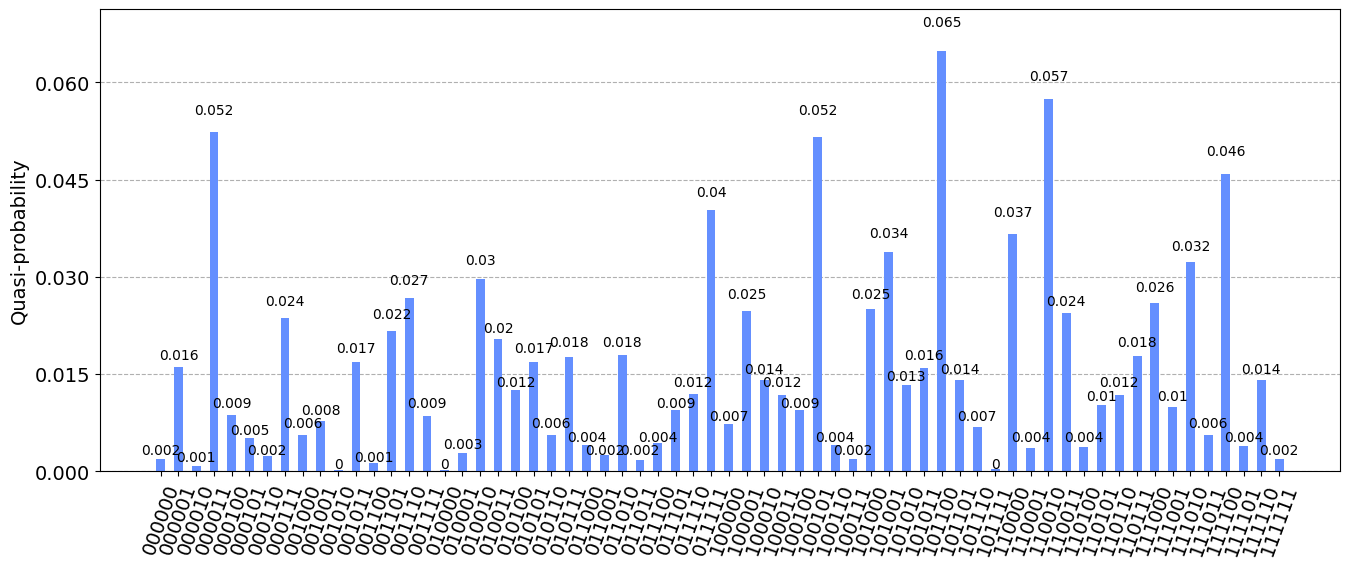

In [18]:
from qiskit.visualization import plot_distribution

plot_distribution(probabilities, figsize=(16, 6))

## 양자컴퓨터로 문제를 풀어봅시다 - 실제 백엔드probabilities

IBM Quantum의 양자 백엔드를 사용하기 위해서는 가장 먼저 IBMid를 생성해야 합니다.

여러분이 만약 이 노트북을 IBM Quantum Cloud에서 실행중이라면 계정 정보를 저장할 필요가 없지만 만약 로컬 환경에서 실행중이라면 다음과 같은 과정을 거쳐 계정 정보를 저장하도록 합니다.

### 실습을 위한 계정 설정 및 백엔드 설정

실습을 위한 계정 설정을 해봅시다. 토큰은 https://quantum.ibm.com 에서 복사해 옵니다.


In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token="Your token", instance="Your instance", overwrite=True)
service = QiskitRuntimeService(channel="ibm_quantum")

여러분이 사용할 수 있는 백엔드들을 확인해 봅시다.

In [20]:
service.backends(simulator=False, operational=True)

[<IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_torino')>]

사용하고자 하는 백엔드를 설정합니다. 

In [21]:
backend = service.get_backend('ibm_brisbane')

Qiskit은 여러분이 선택한 백엔드의 기본 정보들을 쥬피터 노트북에서 바로 확인할 수 있도록 `plot_error_map`과 `plot_gate_map`의 기능을 지원합니다. 이 기능을 사용하기 위해서는 graphviz 홈페이지 https://graphviz.org/graphviz 에서 프로그램을 설치하거나 맥의 경우 터미널에서 `brew install graphviz` 명령어를 실행해 라이브러리를 설치해 주어야 합니다.

설치가 되어 있다고 가정하고 다음의 코드들을 실행해 봅시다.

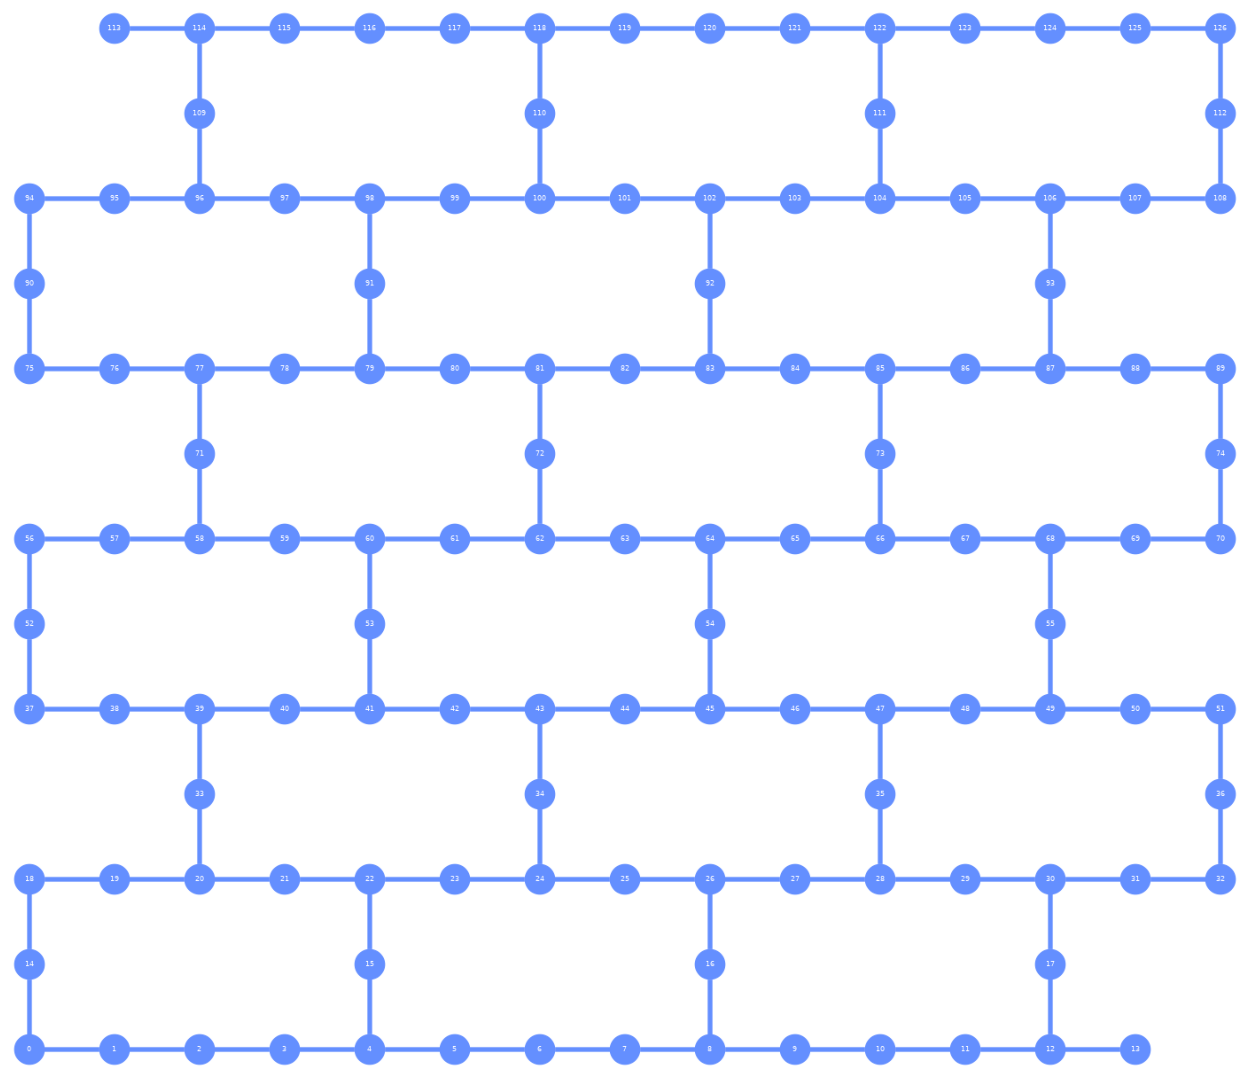

In [22]:
from qiskit.visualization import plot_gate_map

plot_gate_map(backend)

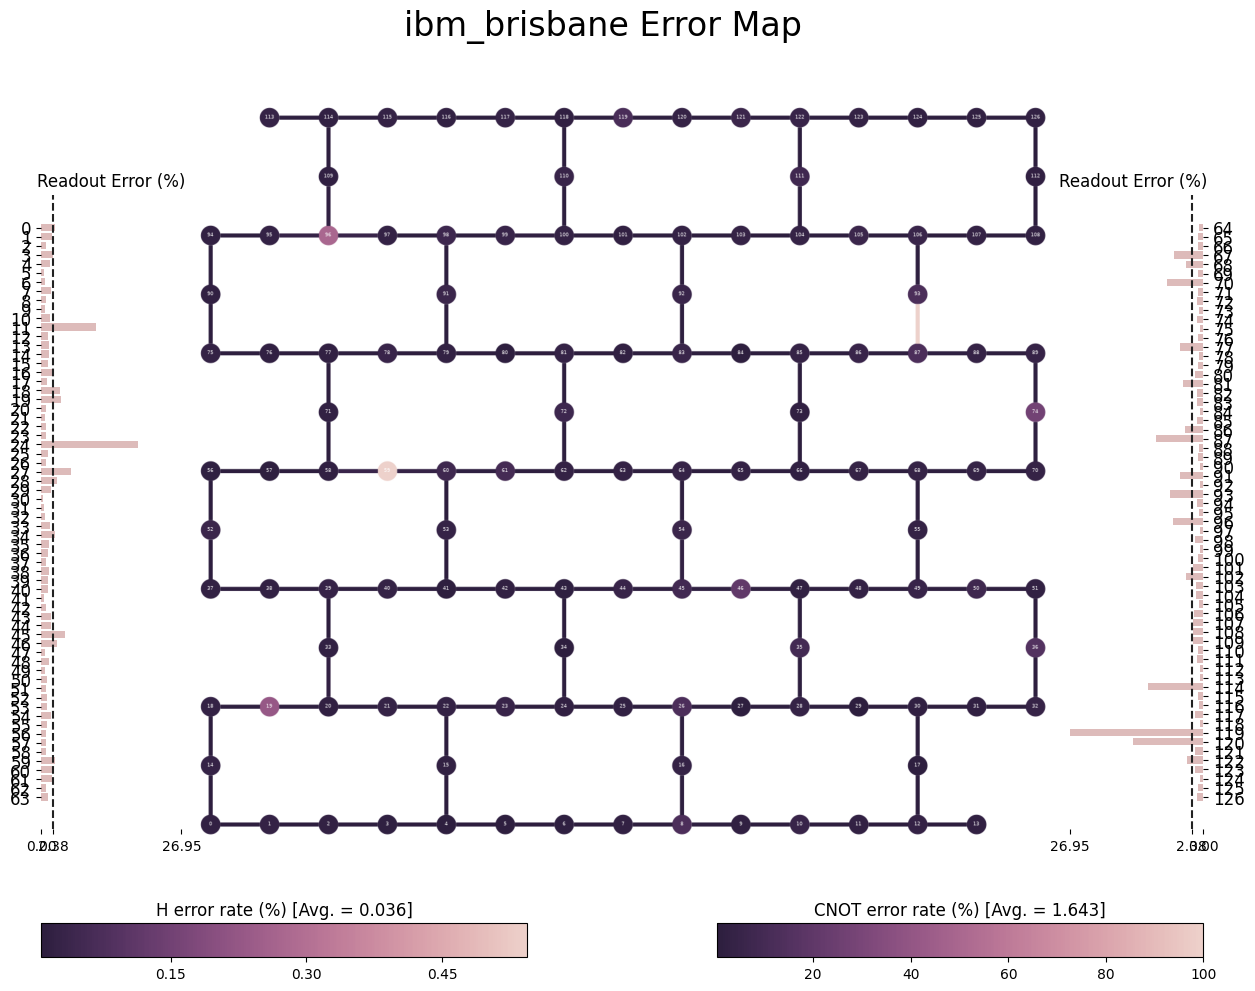

In [23]:
from qiskit.visualization import plot_error_map

plot_error_map(backend)

### Exercise 2: Submitting a job to a real quantum computer

위에서 만들어 둔 문제를 실제 양자 컴퓨터에 실행하는 것은 여러분이 생각하는 것보다 정말 쉽습니다. 주의해야 할 사항은 늘어난 사용자로 인한 대기시간과 QAOA나 VQE와 같은 고전-양자 리소스간 하이브리드 계산의 경우 백엔드로 여러개의 잡이 보내지며 이 과정에서 발생하는 대기 시간으로 인한 불편함입니다. 

반복 계산의 대기시간을 줄이기 위해 Qiskit Runtime은 `Session`을 사용하여, 사용자의 계산이 종료될때까지 백엔드로의 억세스를 __붙잡아두는__ 기능을 제공합니다. 프리미엄 계정의 경우 이 Session이 백엔드를 잡아두는 최대 시간은 최대 약 2시간입니다. 

아래의 코드를 실행하면 노트북이 결과를 얻을때 까지 상당한 시간이 소요됩니다. 마음의 여유를 가지고 한번 도전해 보세요!

In [24]:
from qiskit_ibm_runtime import Options

options = Options()
options.execution.shots = 8192
options.optimization_level = 3 # maximal optimization
options.resilience_level = 1 # error mitigation T-REx (estimator) / M3 (sampler)

In [25]:
from qiskit_ibm_runtime import Session, Estimator, Sampler
from scipy.optimize import minimize

session = Session(service=service, backend=backend)
estimator = Estimator(session=session, options=options)
sampler = Sampler(session=session, options=options)

x0 = 1.5 * np.pi * np.ones(ansatz.num_parameters)
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}
callback = build_callback(callback_dict)

res = minimize(cost_func, x0, args=(ansatz, qubitop, estimator), method="cobyla", callback=callback, options={"maxiter": 50})
print(res)

probabilities = get_probabilities(sampler, ansatz, res)

session.close()

base_primitive._run_primitive:INFO:2023-12-27 04:48:22,856: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:49:05,238: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:49:47,557: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:50:26,465: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:51:09,586: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:51:49,010: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:52:33,888: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:53:21,842: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:54:03,554: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:54:48,079: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:55:28,494: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:56:11,343: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:56:54,147: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:57:36,309: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:58:18,052: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:59:03,579: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 04:59:47,867: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:00:26,565: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:01:17,330: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:01:58,714: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:02:39,829: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:03:18,695: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:04:25,342: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:05:11,749: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:05:50,564: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:06:45,078: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:07:40,309: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:08:37,411: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:09:35,685: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:10:40,395: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:11:29,188: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:12:12,584: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:13:18,288: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:14:01,473: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:14:46,401: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:15:28,383: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:16:19,068: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:17:08,463: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:17:47,505: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:18:33,660: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:19:16,594: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


base_primitive._run_primitive:INFO:2023-12-27 05:19:56,794: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 1}, 'execution': {'shots': 8192, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}


     fun: -4.802707636361819
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 41
  status: 1
 success: True
       x: array([5.71236639, 4.71242846, 4.71245017, 4.71245369])


In [26]:
print_solution(probabilities, conv, qp)

Most probable result: 110010
Interpreted solution: [1. 1. 0. 0.]
Function value: 5.4


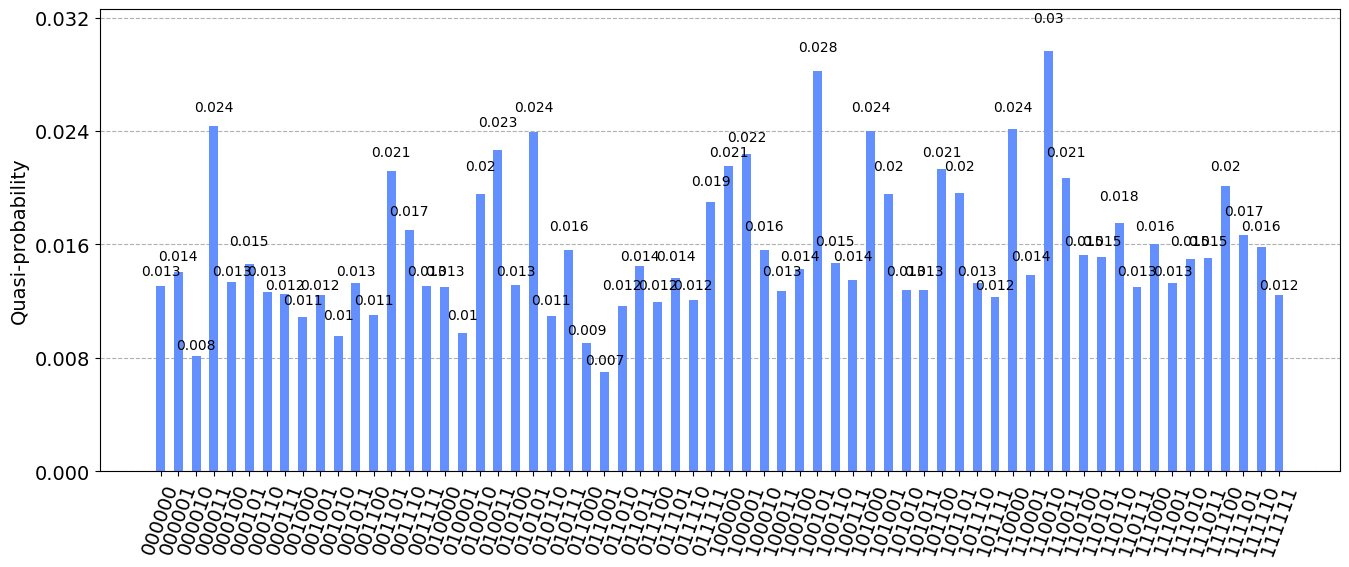

In [27]:
from qiskit.visualization import plot_distribution

plot_distribution(probabilities, figsize=(16, 6))

저의 경우는 위 코드를 실행하는데 총 51번의 백엔드에 계산이 보내졌고 총 4x51 = 204s, 약 4분의 QPU 시간이 소요되었습니다. 

## References

[1] A. A. Nel, ‘Crop rotation in the summer rainfall area of South Africa’, South African Journal of Plant and Soil, vol. 22, no. 4, pp. 274–278, Jan. 2005, doi: 10.1080/02571862.2005.10634721.

[2] H. Ritchie and M. Roser, ‘Crop yields’, Our World in Data, 2013, [Online]. Available: https://ourworldindata.org/crop-yields.

[3] G. Brion, ‘Controlling Pests with Plants: The power of intercropping’, UVM Food Feed, Jan. 09, 2014. https://learn.uvm.edu/foodsystemsblog/2014/01/09/controlling-pests-with-plants-the-power-of-intercropping/ (accessed Feb. 15, 2021).

[4] N. O. Ogot, J. O. Pittchar, C. A. O. Midega, and Z. R. Khan, ‘Attributes of push-pull technology in enhancing food and nutrition security’, African Journal of Agriculture and Food Security, vol. 6, pp. 229–242, Mar. 2018.

In [28]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright